In [16]:
import time
import json
from tweepy.streaming import StreamListener
from tweepy import OAuthHandler
from tweepy import Stream

C_KEY = 'XXXXXXX'
C_SECRET = 'XXXXXXX'
A_TOKEN_KEY = 'XXXXXX'
A_TOKEN_SECRET = 'XXXXXXX'

bbox = [22,49,-119,-64]    # bounding box for United States
lats = []
lons = []

In [24]:
class MyListener(StreamListener):
    def __init__(self, time_limit=30):
        self.start_time = time.time()
        self.limit = time_limit
        super(MyListener, self).__init__()
    
    def on_data(self, data):
        if (time.time() - self.start_time) < self.limit:
            data = json.loads(data)
            if 'coordinates' in data and data['coordinates']:
                longitude, latitude = data['coordinates']['coordinates']
                if latitude > bbox[0] and latitude < bbox[1] and longitude > bbox[2] and longitude < -bbox[3]:
                    lons.append(longitude)
                    lats.append(latitude)
#                    print latitude, ",", longitude
            return True
        else:
            return False

    def on_error(self, status):
        print(status)
        
auth = OAuthHandler(C_KEY,C_SECRET)
auth.set_access_token(A_TOKEN_KEY,A_TOKEN_SECRET)
myStream = Stream(auth, MyListener(time_limit=600))
myStream.filter(track=[ 'superbowl', 'super bowl', 'football'])

41.66900774 , -73.98039447
41.77842988 , -81.13553257
39.9457731 , -86.1477107
42.37356418 , -71.12133731
28.19478932 , -82.50367058
38.90024882 , -76.99998949
40.7207559 , -74.0007613
40.82786913 , -73.50245575
39.9622783 , -75.1412627
33.13755119 , -97.734375
33.00137556 , -96.70438528
32.9167085 , -96.7678438
41.59233747 , -93.60351563
29.7629 , -95.3832
40.747214 , -73.954733
33.13755119 , -97.734375
40.74225526 , -73.95587537
45.00123 , -93.26664
42.09593024 , -72.58681881
41.66900774 , -73.98039447
29.7629 , -95.3832
30.26851 , -97.72559
33.9632999 , -118.00067
29.57709615 , -95.64366817
29.685 , -95.411
42.36415316 , -71.10178308
30.428101 , -81.663811
29.68472222 , -95.41083333
35.3524676 , -80.68549036
40.86086 , -73.42157
25.683611 , -100.288056
38.8991 , -77.029
38.8991 , -77.029
38.8991 , -77.029
38.8991 , -77.029
40.0 , -100.0
39.0131121 , -78.77551672
29.7811 , -95.5395
40.4203 , -3.7058
42.709549 , -89.0111008
29.75502565 , -95.3663275
35.22583333 , -80.85277778
41.85265

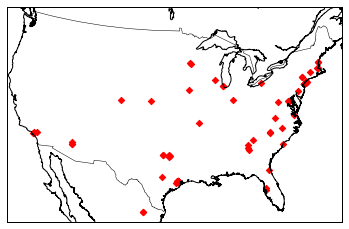

In [25]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
%matplotlib inline

map = Basemap(llcrnrlon=bbox[2], llcrnrlat=bbox[0], urcrnrlon=bbox[3],urcrnrlat=bbox[1], 
              projection='lcc', lat_1=33, lon_0=-95, resolution='i', area_thresh=10000)             
map.drawcoastlines()
map.drawcountries()
#map.drawstates()
(x,y) = map(lons,lats)       
map.scatter(x, y, marker='D',color='r')   # plot the points
plt.draw()